In [1]:
import pandas as pd
import numpy as np
# Get the file from the user's Google Drive
file_path = "E:\\NIDS_FINAL\\Data\\dataset\\KDDTrain+.txt"

# Read the file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Print the DataFrame
print(df)
import tensorflow as tf
import tensorflow.keras as keras

        0  tcp  ftp_data   SF   491   0.1  0.2  0.3  0.4  0.5  ...  0.17  \
0       0  udp     other   SF   146     0    0    0    0    0  ...  0.00   
1       0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
2       0  tcp      http   SF   232  8153    0    0    0    0  ...  1.00   
3       0  tcp      http   SF   199   420    0    0    0    0  ...  1.00   
4       0  tcp   private  REJ     0     0    0    0    0    0  ...  0.07   
...    ..  ...       ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
125967  0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
125968  8  udp   private   SF   105   145    0    0    0    0  ...  0.96   
125969  0  tcp      smtp   SF  2231   384    0    0    0    0  ...  0.12   
125970  0  tcp    klogin   S0     0     0    0    0    0    0  ...  0.03   
125971  0  tcp  ftp_data   SF   151     0    0    0    0    0  ...  0.30   

        0.03  0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0       0.60 

In [2]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
    ,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
    ,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
    ,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
    ,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
    ,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
df.columns=columns

In [3]:
def calculate_value_frequencies(df, column):
    value_frequencies = df[column].value_counts()
    total_samples = df.shape[0]

    result_df = pd.DataFrame(columns=['Rank', 'Value', 'Frequency', 'Percentage'])

    for rank, (value, frequency) in enumerate(value_frequencies.items(), start=1):
        percentage = (frequency / total_samples) * 100
        temp_df = pd.DataFrame(data={'Rank': [rank], 'Value': [value], 'Frequency': [frequency], 'Percentage': [percentage]})
        result_df = pd.concat([result_df, temp_df], ignore_index=True)

    return result_df.set_index('Rank')

def plot_histogram(df, column, x=10, y=6):
    value_frequencies = calculate_value_frequencies(df, column)
    print(value_frequencies)
    plt.figure(figsize=(x, y))
    plt.bar(value_frequencies['Value'], value_frequencies['Frequency'])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

    plt.show()

                Value Frequency  Percentage
Rank                                       
1              normal     67342   53.457911
2             neptune     41214   32.716794
3               satan      3633    2.883974
4             ipsweep      3599    2.856984
5           portsweep      2931    2.326708
6               smurf      2646    2.100467
7                nmap      1493    1.185184
8                back       956    0.758899
9            teardrop       892    0.708094
10        warezclient       890    0.706506
11                pod       201    0.159559
12       guess_passwd        53    0.042073
13    buffer_overflow        30    0.023815
14        warezmaster        20    0.015877
15               land        18    0.014289
16               imap        11    0.008732
17            rootkit        10    0.007938
18         loadmodule         9    0.007144
19          ftp_write         8    0.006351
20           multihop         7    0.005557
21                phf         4 

C:\Users\dayal\AppData\Local\Temp\ipykernel_18612\1979673482.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, temp_df], ignore_index=True)


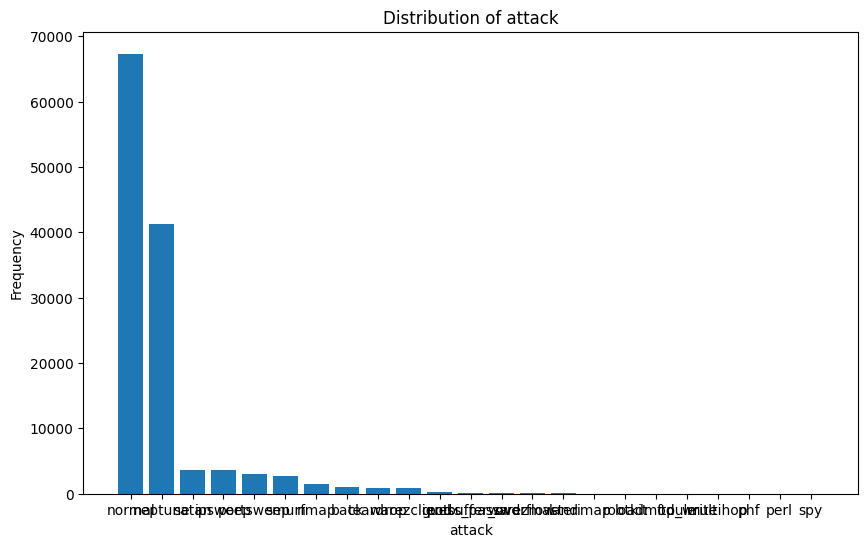

In [4]:
import matplotlib.pyplot as plt
plot_histogram(df, 'attack')

In [5]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

print(df)


        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              2       44     9        146          0     0   
1              0              1       49     5          0          0     0   
2              0              1       24     9        232       8153     0   
3              0              1       24     9        199        420     0   
4              0              1       49     1          0          0     0   
...          ...            ...      ...   ...        ...        ...   ...   
125967         0              1       49     5          0          0     0   
125968         8              2       49     9        105        145     0   
125969         0              1       54     9       2231        384     0   
125970         0              1       30     5          0          0     0   
125971         0              1       20     9        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rat

In [6]:

features = df.drop('attack', axis=1)
labels = df['attack']

# Convert features and labels to numpy arrays
features_np = features.to_numpy()
labels_np = labels.to_numpy()


In [7]:
features_np.shape

(125972, 42)

In [8]:

from sklearn.model_selection import train_test_split

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_np, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Train data shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)


Train data shape: (90699, 42)
Train labels shape: (90699,)
Test data shape: (25195, 42)
Test labels shape: (25195,)
Validation data shape: (10078, 42)
Validation labels shape: (10078,)


In [9]:

import numpy as np
# Create a CNN model
model = keras.Sequential()
model.add(keras.layers.Conv1D(filters=features_np.shape[1], kernel_size=3, activation='relu', input_shape=(features_np.shape[1], 1)))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(len(df.attack.unique()), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Get the feature importance
importance = np.mean(np.abs(model.layers[0].get_weights()[0]), axis=0)
importance = importance.T
# Sort the features by importance


# Print the sorted features


Epoch 1/10


D:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2835/2835 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8534 - loss: 1784.0057 - val_accuracy: 0.9223 - val_loss: 783.3436
Epoch 2/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8834 - loss: 8009.0254 - val_accuracy: 0.8968 - val_loss: 150.8882
Epoch 3/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8966 - loss: 695.6146 - val_accuracy: 0.9314 - val_loss: 2102.6201
Epoch 4/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8754 - loss: 4567.8550 - val_accuracy: 0.8083 - val_loss: 8916.1123
Epoch 5/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8645 - loss: 3659.9243 - val_accuracy: 0.8883 - val_loss: 1859.8099
Epoch 6/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8670 - loss: 4282.9155 - val_accuracy: 0.7414 - val_loss: 232.7759
Epoch 7/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8780 - loss: 3162.9329 - val_accuracy: 0.7678 - val_loss: 9329.6328
Epoch 8/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accurac

In [10]:
print(f"Shape of features_np: {features_np.shape}")
print(f"Shape of importance: {importance.shape}")

Shape of features_np: (125972, 42)
Shape of importance: (42, 1)


In [11]:
importance.shape

(42, 1)

In [12]:

import numpy as np
importance_series = pd.Series(importance.ravel())
importance_series.index = features.columns
threshold = 0.2
important_features = importance_series[importance_series > threshold]
print(important_features)


land                        0.249397
num_compromised             0.293384
root_shell                  0.709124
num_file_creations          0.991644
num_shells                  0.415793
diff_srv_rate               0.770466
srv_diff_host_rate          0.388051
dst_host_same_srv_rate      0.228348
dst_host_srv_rerror_rate    1.510400
dtype: float32


In [13]:

important_features_df = df[important_features.index.tolist()]


In [14]:
important_features_df.head()

,land,num_compromised,root_shell,num_file_creations,num_shells,diff_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_srv_rerror_rate
0,0,0,0,0,0,0.15,0.00,0.00,0.00
1,0,0,0,0,0,0.07,0.00,0.10,0.00
2,0,0,0,0,0,0.00,0.00,1.00,0.01
3,0,0,0,0,0,0.00,0.09,1.00,0.00
4,0,0,0,0,0,0.06,0.00,0.07,1.00


In [15]:
from sklearn import svm
X_train1, X_test1, y_train1, y_test1 = train_test_split(important_features_df, labels, test_size=0.2, random_state=42)

# Create a SVM model
model1 = svm.SVC()

# Train the model
model1.fit(X_train1, y_train1)

# Evaluate the model on the test set
test_accuracy = model1.score(X_test1, y_test1)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.7971422901369319


In [16]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train1, y_train1)

RandomForestClassifier()

In [17]:
from sklearn.metrics import accuracy_score
y_pred = model2.predict(X_test1)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9123238737844811


In [18]:

from sklearn.ensemble import VotingClassifier

estimators=[('svm', model1),('rf', model2)]
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train1, y_train1)
y_pred2 = ensemble.predict(X_test1)
accuracy = accuracy_score(y_test1, y_pred2)
print(accuracy)


0.8240920817622545


In [19]:
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier()

In [20]:
inv=le.inverse_transform(y_pred)

In [21]:
inv

array(['neptune', 'ipsweep', 'normal', ..., 'normal', 'neptune',
       'neptune'], dtype=object)

In [22]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,11,15
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,9,19
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,11,21
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,11,21
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,9,21


In [23]:
name=important_features_df.columns

In [24]:
name=name.tolist()

In [25]:
name

['land',
 'num_compromised',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_rerror_rate']

In [26]:

correlations = df.corr()['attack'].drop('attack')
correlations

duration                       0.134590
protocol_type                  0.135203
service                       -0.001797
flag                           0.170749
src_bytes                      0.011617
dst_bytes                      0.007600
land                          -0.017239
wrong_fragment                 0.304125
urgent                        -0.003513
hot                            0.098611
num_failed_logins             -0.024052
logged_in                      0.104058
num_compromised                0.000346
root_shell                    -0.009355
su_attempted                   0.004005
num_root                       0.001718
num_file_creations             0.003004
num_shells                     0.000743
num_access_files               0.005220
num_outbound_cmds                   NaN
is_host_login                  0.000400
is_guest_login                 0.109112
count                          0.060381
srv_count                      0.310820
serror_rate                   -0.361326


In [27]:
from joblib import dump

# Train your SVC model
# ... (your training code)

# Save the model
dump(model1, 'svc_model.joblib')

print('Model saved successfully!')
from tensorflow.keras.models import save_model  # For saving models

# Save model
dump(model, 'Model.h5')
dump(model2, 'rf_model.joblib')
dump(ensemble, 'Ensemble.joblib')

print('All models saved successfully!')


Model saved successfully!
All models saved successfully!
